In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torchvision import models
import time
import matplotlib.pyplot as plt

transform_train = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),  
])

transform_test = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),  
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=8, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)
testloader = torch.utils.data.DataLoader(testset, batch_size=8, shuffle=False, num_workers=2)


100%|██████████| 170498071/170498071 [00:02<00:00, 74183180.48it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [2]:
trainset

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
               Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))
           )

In [3]:
testset

Dataset CIFAR10
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
               Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))
           )

In [4]:
!pip install torchsummary

In [5]:
import torch
import torch.nn as nn
import torchvision.models as models
from torchsummary import summary
from torch.optim.lr_scheduler import ReduceLROnPlateau
import warnings


warnings.filterwarnings("ignore")

model = models.vgg19(pretrained=True)

for param in model.parameters():
    param.requires_grad = False

for name, param in model.named_parameters():
    if 'features.28' in name :
        param.requires_grad = True

model.classifier = nn.Sequential(
    nn.Linear(25088, 256),
    nn.ELU(),
    nn.Dropout(0.5),
    nn.Linear(256, 10),
)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

summary(model, (3, 224, 224))

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)
scheduler = ReduceLROnPlateau(optimizer, mode='max', factor=0.6, patience=3, verbose=True, min_lr=1e-7)



print("\nLayer status:")
for name, param in model.named_parameters():
    print(f"{name}: requires_grad={param.requires_grad}")



Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth
100%|██████████| 548M/548M [00:08<00:00, 64.2MB/s]


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 224, 224]           1,792
              ReLU-2         [-1, 64, 224, 224]               0
            Conv2d-3         [-1, 64, 224, 224]          36,928
              ReLU-4         [-1, 64, 224, 224]               0
         MaxPool2d-5         [-1, 64, 112, 112]               0
            Conv2d-6        [-1, 128, 112, 112]          73,856
              ReLU-7        [-1, 128, 112, 112]               0
            Conv2d-8        [-1, 128, 112, 112]         147,584
              ReLU-9        [-1, 128, 112, 112]               0
        MaxPool2d-10          [-1, 128, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]         295,168
             ReLU-12          [-1, 256, 56, 56]               0
           Conv2d-13          [-1, 256, 56, 56]         590,080
             ReLU-14          [-1, 256,

In [6]:
if device.type == 'cuda':
    print(torch.cuda.get_device_name(0))
model.to(device)


Tesla T4


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

training started on Tesla T4
Epoch 1/10, Loss: 0.4266, Val Loss: 0.3835, Accuracy: 85.42%, Val Accuracy: 87.43%, Train Time: 471.10s, Val Time: 85.30s
Epoch 2/10, Loss: 0.2526, Val Loss: 0.2752, Accuracy: 91.38%, Val Accuracy: 90.79%, Train Time: 482.89s, Val Time: 84.92s
Epoch 3/10, Loss: 0.1845, Val Loss: 0.3020, Accuracy: 93.82%, Val Accuracy: 90.46%, Train Time: 482.49s, Val Time: 85.57s
Epoch 4/10, Loss: 0.1445, Val Loss: 0.3236, Accuracy: 95.06%, Val Accuracy: 90.19%, Train Time: 484.03s, Val Time: 85.67s
Epoch 5/10, Loss: 0.1178, Val Loss: 0.2898, Accuracy: 96.08%, Val Accuracy: 91.60%, Train Time: 483.98s, Val Time: 85.22s
Epoch 6/10, Loss: 0.0943, Val Loss: 0.3093, Accuracy: 96.82%, Val Accuracy: 91.31%, Train Time: 483.50s, Val Time: 85.47s
Epoch 7/10, Loss: 0.0795, Val Loss: 0.3243, Accuracy: 97.33%, Val Accuracy: 91.61%, Train Time: 483.55s, Val Time: 85.64s
Epoch 8/10, Loss: 0.0726, Val Loss: 0.3441, Accuracy: 97.60%, Val Accuracy: 91.78%, Train Time: 485.07s, Val Time: 85

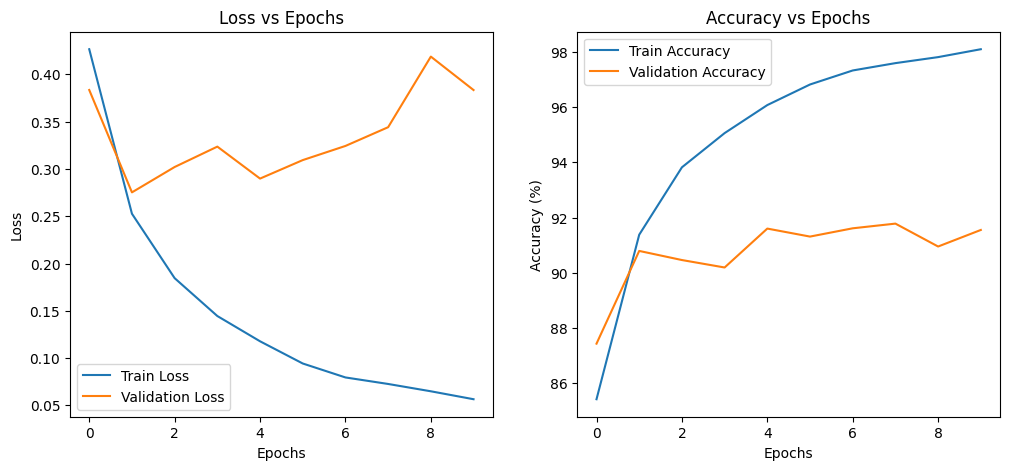

Average Training Time per Epoch: 482.73s
Average Validation Time per Epoch: 85.44s


In [7]:


num_epochs = 10
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []
train_times = []
val_times = []
print('training started on',torch.cuda.get_device_name(0))
for epoch in range(num_epochs):
    start_time = time.time()
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    for inputs, labels in trainloader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    train_losses.append(running_loss / len(trainloader))
    train_accuracies.append(100 * correct_train / total_train)

    epoch_time = time.time() - start_time
    train_times.append(epoch_time)

    model.eval()
    running_val_loss = 0.0
    correct_val = 0
    total_val = 0
    val_start_time = time.time()
    with torch.no_grad():
        for inputs, labels in testloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

    val_epoch_time = time.time() - val_start_time
    val_times.append(val_epoch_time)

    val_losses.append(running_val_loss / len(testloader))
    val_accuracies.append(100 * correct_val / total_val)

    scheduler.step(val_accuracies[-1])

    print(f'Epoch {epoch+1}/{num_epochs}, '
          f'Loss: {train_losses[-1]:.4f}, '
          f'Val Loss: {val_losses[-1]:.4f}, '
          f'Accuracy: {train_accuracies[-1]:.2f}%, '
          f'Val Accuracy: {val_accuracies[-1]:.2f}%, '
          f'Train Time: {epoch_time:.2f}s, '
          f'Val Time: {val_epoch_time:.2f}s')

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy vs Epochs')
plt.legend()

plt.show()

avg_train_time = sum(train_times) / num_epochs
avg_val_time = sum(val_times) / num_epochs
print(f'Average Training Time per Epoch: {avg_train_time:.2f}s')
print(f'Average Validation Time per Epoch: {avg_val_time:.2f}s')


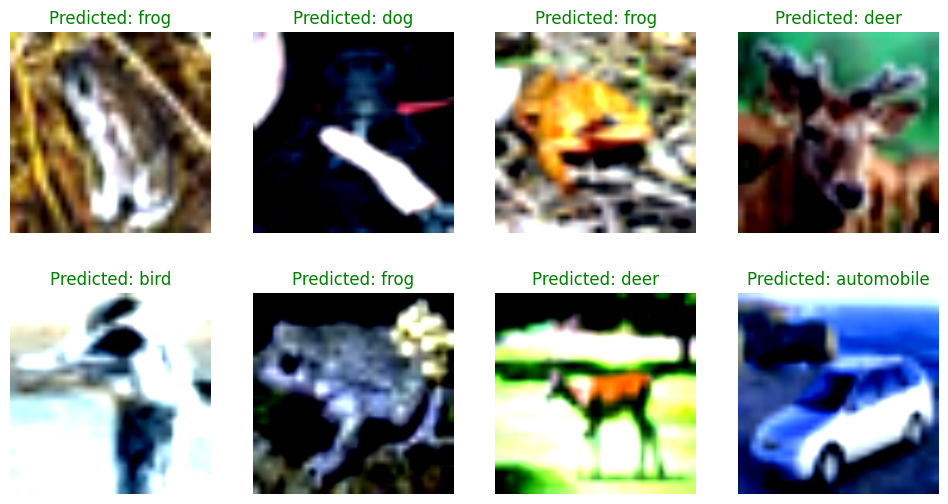

In [8]:
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np


def imshow(img):
    img = img / 2 + 0.5  
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(trainloader)
images, labels = next(dataiter)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
images = images.to(device)

model.eval()
outputs = model(images)
_, predicted = torch.max(outputs, 1)

images = images.cpu()
predicted = predicted.cpu()

fig, axes = plt.subplots(2, 4, figsize=(12, 6))
fig.subplots_adjust(hspace=0.3)
axes = axes.ravel()

for i in range(8):
    image = images[i] / 2 + 0.5  
    npimg = image.numpy()
    axes[i].imshow(np.transpose(npimg, (1, 2, 0)))
    axes[i].set_title(f'Predicted: {trainloader.dataset.classes[predicted[i]]}', color='green' if predicted[i] == labels[i] else 'red')
    axes[i].axis('off')

plt.show()